# Import Library

In [1]:
# Basic Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

Context:
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

For more information regarding this dataset, please visit: https://www.kaggle.com/blastchar/telco-customer-churn

Categorical Feature:
* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is 65 or older or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not. Dependents could be children, parents, grandparents, etc. (Yes, No)
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection for their Internet equipment or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Numerical Feature:
* Tenure : Number of months the customer has stayed with the company
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer

Target Feature: 
* Churn : Whether the customer churned or not (Yes or No)

# Load Dataset

In [2]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
# Checking the shape of the dataset
df.shape
# There are 7043 rows and 21 columns in total

(7043, 21)

In [4]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on this information, we can see the TotalCharges feature is an object data type where it should have been a float data type since it has numerical values and is similar to MonthlyCharges feature. So, I decided to change the TotalCharges feature data type into float/numerical. But, I would like to check the feature first.

In [5]:
# Checking the value counts of TotalCharges feature
df['TotalCharges'].value_counts()
# There are 11 empty string data

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
1422.05     1
1336.1      1
865.55      1
5440.9      1
1566.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
# Locating the rows that has empty string on its TotalCharges feature
df[df['TotalCharges']==' ']
# For some reason, these 11 empty string data has 0 tenure

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Checking missing data
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Those 11 empty string data in TotalCharges feature is treated as missing data after I changed it to numerical data type. I decided to drop the data since those customers has 0 tenure anyway.

In [9]:
df.dropna(inplace=True)

In [10]:
# Rechecking the missing data
df.isna().sum()
# There is no missing data anymore

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Renaming/Capitalizing 3 column names for consistency
df = df.rename(columns={'customerID' : 'CustomerID', 'gender' : 'Gender', 'tenure' : 'Tenure'})

In [12]:
# Rechecking all of the column names
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df['Churn'].value_counts()
# Imbalanced dataset

No     5163
Yes    1869
Name: Churn, dtype: int64

In [14]:
df['Churn'].value_counts()/df.shape[0]
# 73,4% No and 26,5% Yes

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

# Exploratory Data Analysis (EDA)

## Categorical Features

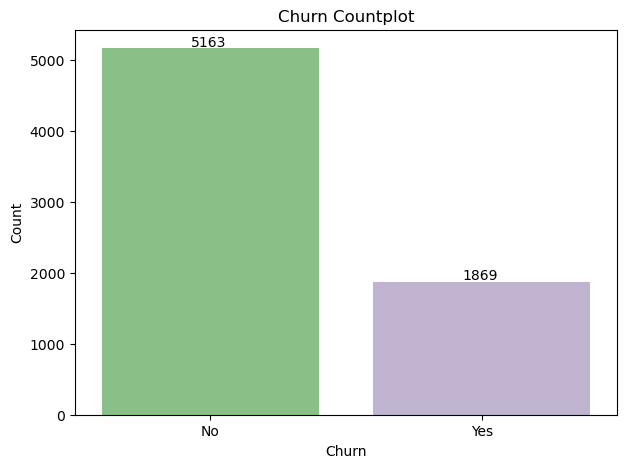

In [15]:
# Churn Countplot

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Churn', data=df, palette='Accent')
plt.title('Churn Countplot', fontdict={'fontsize':12})
plt.xlabel('Churn')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+30))

* Our customer base has around 26% churn rate

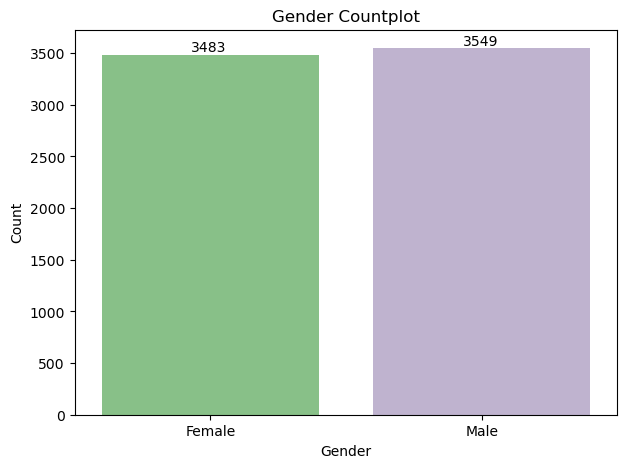

In [16]:
# Gender Countplot

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Gender', data=df, palette='Accent')
plt.title('Gender Countplot', fontdict={'fontsize':12})
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+30))

* We have similar number of Female and Male Customers.

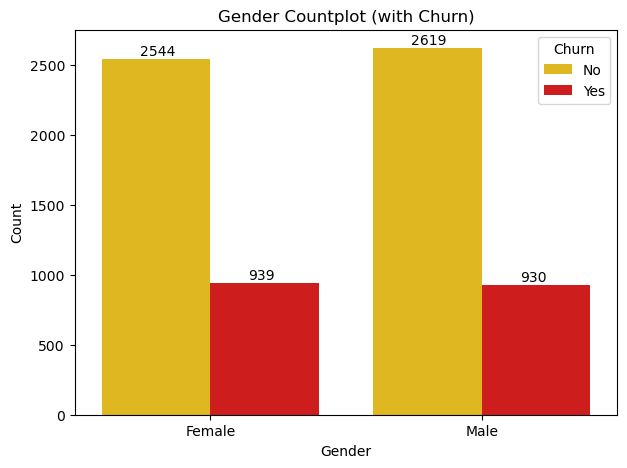

In [17]:
# Gender Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Gender', hue = 'Churn', data=df, palette='hot_r')
plt.title('Gender Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.14, p.get_height()+25)) 

* The ratio of Female and Male customers who churned is relatively similar (27% vs 26% respectively).
* We can infer that the reason of our customers who churned is not necessarily because of Gender.

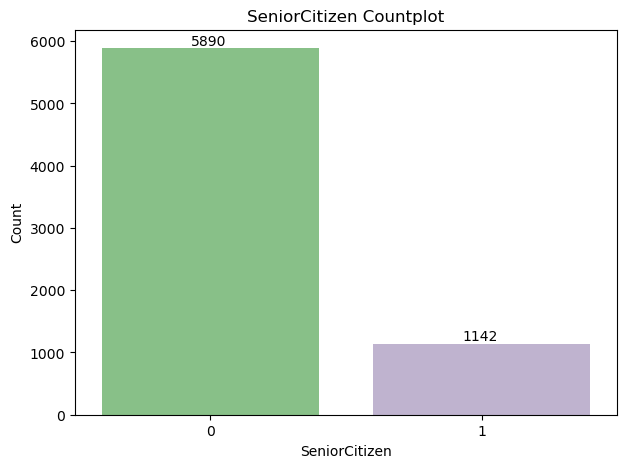

In [18]:
# SeniorCitizen Countplot

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='SeniorCitizen', data=df, palette='Accent')
plt.title('SeniorCitizen Countplot', fontdict={'fontsize':12})
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+50)) 

* The majority of our customers is non-SeniorCitizen.
* The percentage of SeniorCitizen customers is around 16% of total customers.

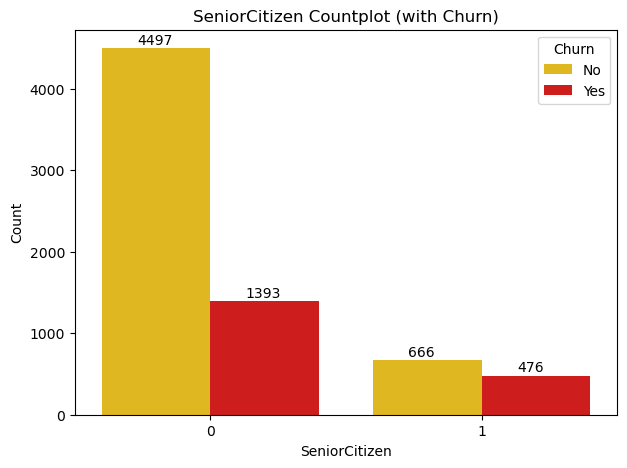

In [19]:
# SeniorCitizen Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='SeniorCitizen', hue = 'Churn', data=df, palette='hot_r')
plt.title('SeniorCitizen Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+50))

* Although the amount of SeniorCitizen customers is smaller compared to non-SeniorCitizen customers (which means it is a niche market), the Churn ratio of these customers are around 41%.
* The ratio of SeniorCitizen customers who churned (41%) is higher than non-SeniorCitizen customers (23%).

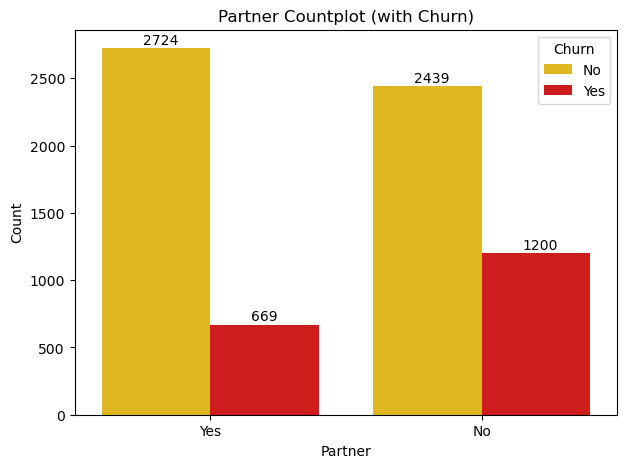

In [20]:
# Partner Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Partner', hue = 'Churn', data=df, palette='hot_r')
plt.title('Partner Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Partner')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))

* The ratio of the customers without Partner who churned (33%) is higher than the customers with Partner (20%).
* Customers without Partner are more likely to Churn.

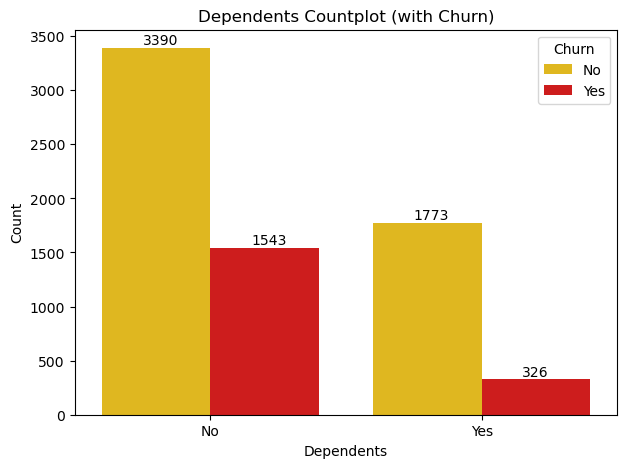

In [21]:
# Dependents Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Dependents', hue = 'Churn', data=df, palette='hot_r')
plt.title('Dependents Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Dependents')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))

* The ratio of the customers without Dependents who churned (31%) is higher than the customers with Dependents (16%).
* Customers without Dependents are more likely to Churn.

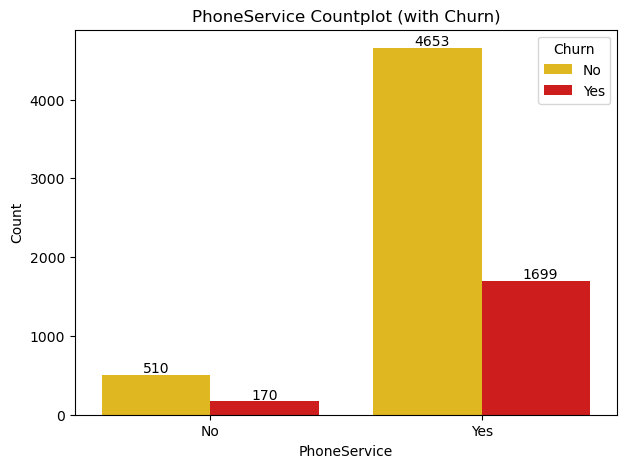

In [22]:
# PhoneService Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='PhoneService', hue = 'Churn', data=df, palette='hot_r')
plt.title('PhoneService Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('PhoneService')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))

* Majority of our customers use our PhoneService.
* Although the number of customers who used our PhoneService and did not use our PhoneService has a really big difference in terms of number, the ratio of the customers who churned in their respective category is really similar (No : 25 % vs Yes : 26%).
* We can infer that the reason of our customers who churned is not necessarily because of PhoneService.

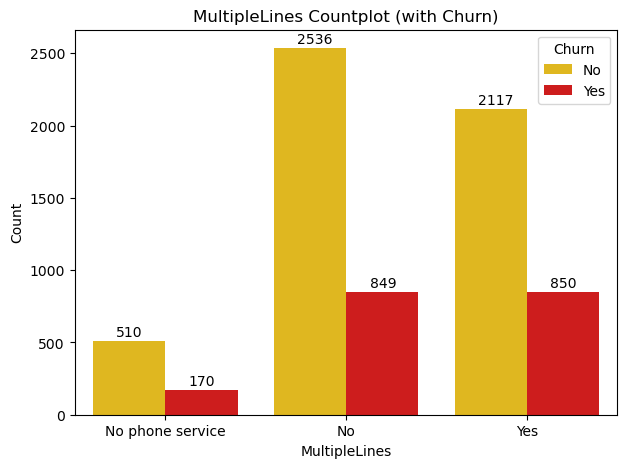

In [23]:
# MultipleLines Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='MultipleLines', hue = 'Churn', data=df, palette='hot_r')
plt.title('MultipleLines Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('MultipleLines')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+30))

* This graph is the breakdown from PhoneService graph.
* Although the ratio is similar, the customers who used our PhoneService and our MultipleLines service has slightly higher Churn rate (28%) than the customers who used our PhoneService but did not use our MultipleLines service (25%).
* We can infer that the reason of our customers who churned is not necessarily because of MultipleLines.

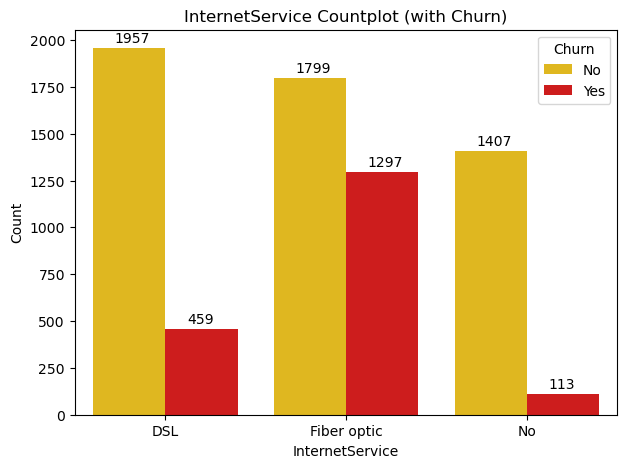

In [24]:
# InternetService Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='InternetService', hue = 'Churn', data=df, palette='hot_r')
plt.title('InternetService Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('InternetService')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* Customers who used our Fiber Optic as their InternetService has the highest Churn rate (42%). On the other hand, the customers who used our DSL as their InternetService has 19% Churn rate. While the customers who did not use our InternetService has the lowest Churn rate (7%).
* Fiber optic InternetService customers are more likely to Churn.

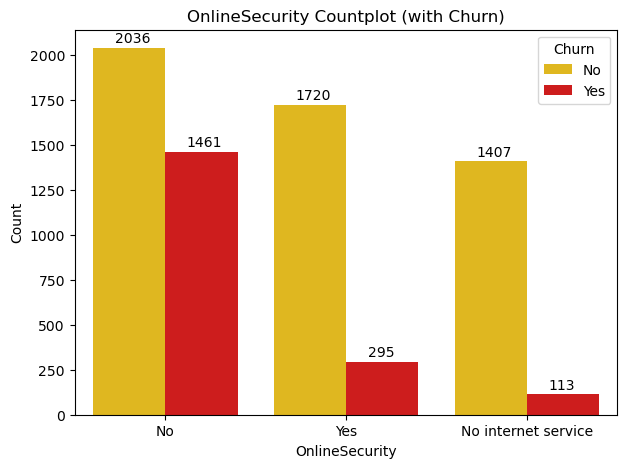

In [25]:
# OnlineSecurity Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='OnlineSecurity', hue = 'Churn', data=df, palette='hot_r')
plt.title('OnlineSecurity Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* This is the continuation of InternetService feature.
* Customers who used our InternetService but did not use our OnlineSecurity service has higher Churn rate (42%) than the customers who used our InternetService and OnlineSecurity service (15%). The former type of customers are more likely to Churn than the latter.

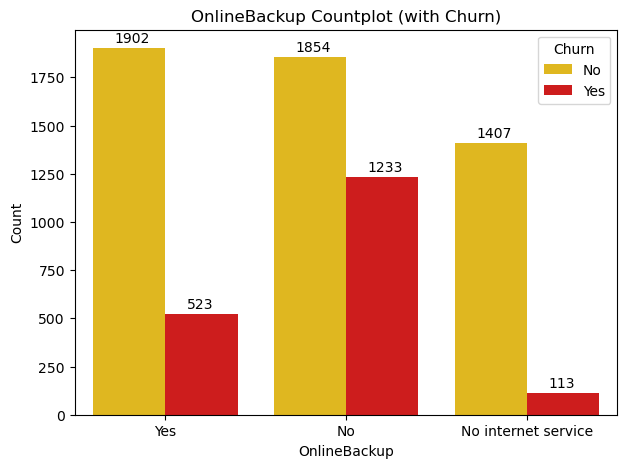

In [26]:
# OnlineBackup Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='OnlineBackup', hue = 'Churn', data=df, palette='hot_r')
plt.title('OnlineBackup Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('OnlineBackup')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* This is the continuation of InternetService feature.
* Customers who used our InternetService but did not use our OnlineBackup service has higher Churn rate (40%) than the customers who used our InternetService and OnlineBackup service (22%). The former type of customers are more likely to Churn than the latter.

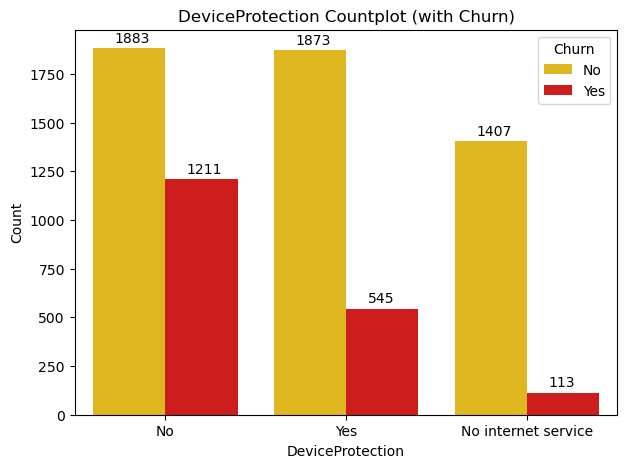

In [27]:
# DeviceProtection Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='DeviceProtection', hue = 'Churn', data=df, palette='hot_r')
plt.title('DeviceProtection Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('DeviceProtection')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* This is the continuation of InternetService feature.
* Customers who used our InternetService but did not use our DeviceProtection service has higher Churn rate (39%) than the customers who used our InternetService and DeviceProtection service (23%). The former type of customers are more likely to Churn than the latter.

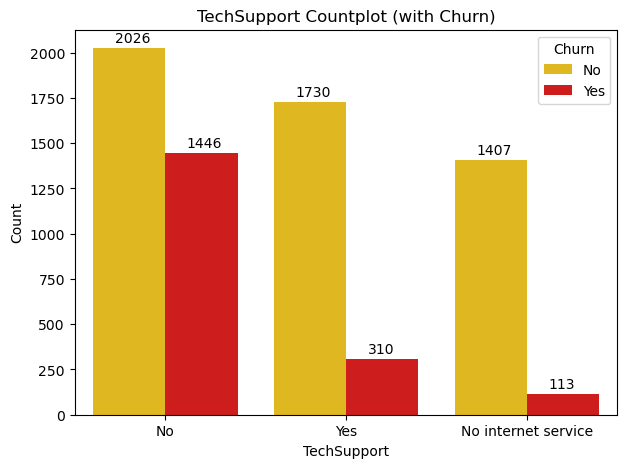

In [28]:
# TechSupport Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='TechSupport', hue = 'Churn', data=df, palette='hot_r')
plt.title('TechSupport Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('TechSupport')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* This is the continuation of InternetService feature.
* Customers who used our InternetService but did not use our TechSupport service has higher Churn rate (42%) than the customers who used our InternetService and TechSupport service (15%). The former type of customers are more likely to Churn than the latter.

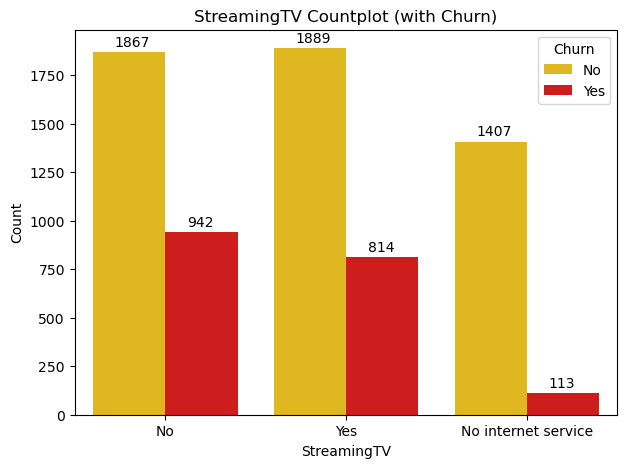

In [29]:
# StreamingTV Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='StreamingTV', hue = 'Churn', data=df, palette='hot_r')
plt.title('StreamingTV Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('StreamingTV')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+30))

* This is the continuation of InternetService feature.
* Although the ratio is similar, the customers who used our InternetService but did not use our StreamingTV service has slightly higher Churn rate (33%) than the customers who used our InternetService and StreamingTV service (30%).
* We can infer that the reason of our customers who churned is not necessarily because of our StreamingTV service.

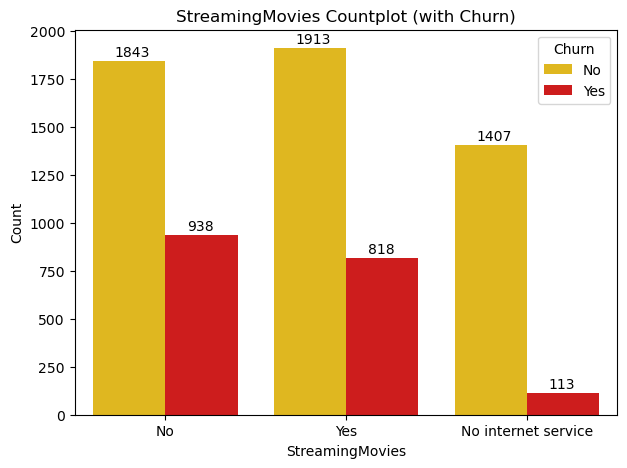

In [30]:
# StreamingMovies Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='StreamingMovies', hue = 'Churn', data=df, palette='hot_r')
plt.title('StreamingMovies Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('StreamingMovies')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+25))

* This is the continuation of InternetService feature.
* Although the ratio is also similar, the customers who used our InternetService but did not use our StreamingMovies service has slightly higher Churn rate (33%) than the customers who used our InternetService and StreamingMovies service (29%).
* We can infer that the reason of our customers who churned is not necessarily because of our StreamingMovies service.

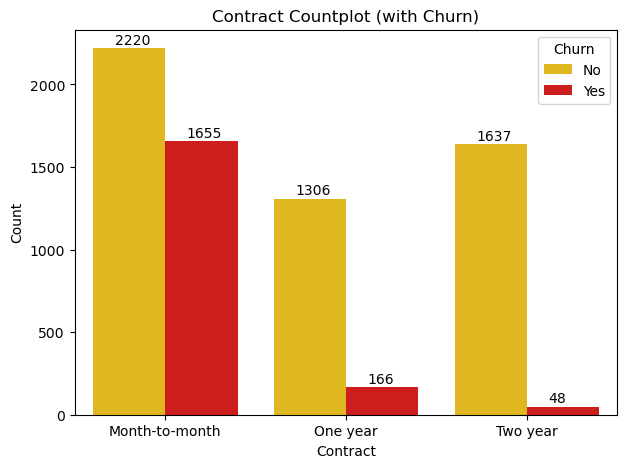

In [31]:
# Contract Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Contract', hue = 'Churn', data=df, palette='hot_r')
plt.title('Contract Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Contract')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+25))

* Customers who used Month-to-month Contract has the highest Churn rate (43%). On the other hand, the customers who used one-year Contract has 11% Churn rate and the customers who used two-year Contract has 3% Churn rate.
* Month-to-month Contract customers are more likely to Churn.

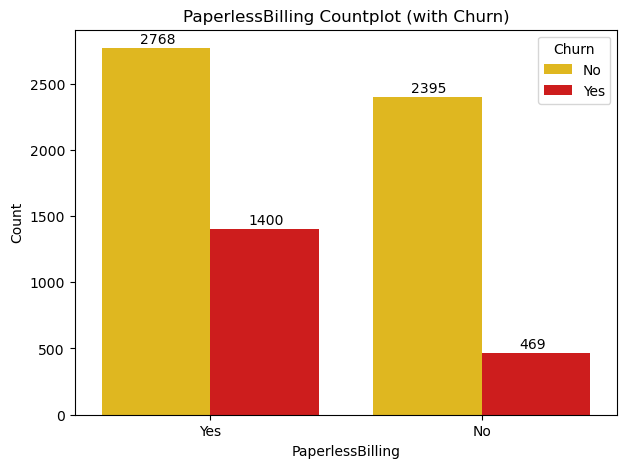

In [32]:
# PaperlessBilling Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='PaperlessBilling', hue = 'Churn', data=df, palette='hot_r')
plt.title('PaperlessBilling Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.14, p.get_height()+35))

* The customers who used PaperlessBilling has higher Churn rate (34%) than the customers who did not use PaperlessBilling (16%).
* PaperlessBilling customers are more likely to Churn.

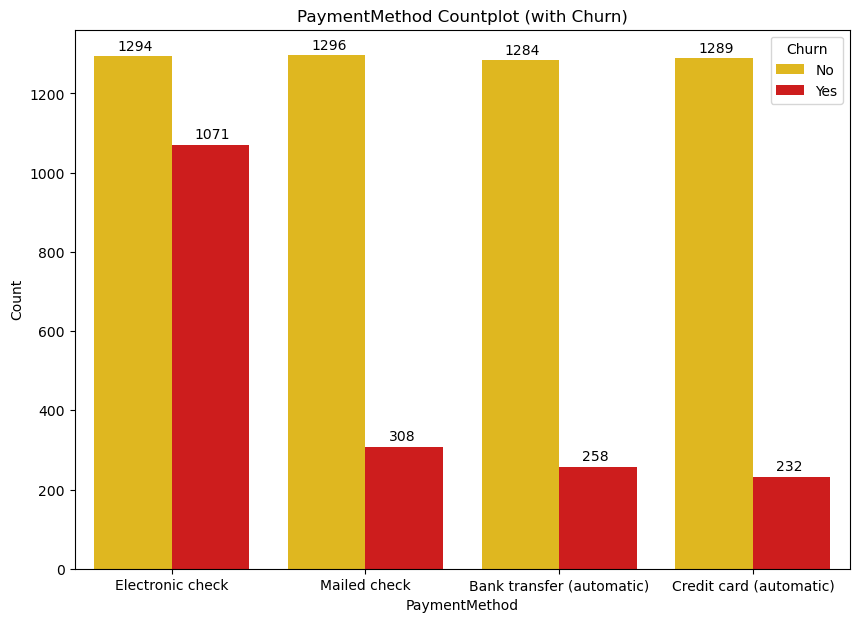

In [33]:
# PaymentMethod Countplot (with Churn)

plt.style.use('default')
plt.figure(figsize=(10,7))
ax = sns.countplot(x='PaymentMethod', hue = 'Churn', data=df, palette='hot_r')
plt.title('PaymentMethod Countplot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('PaymentMethod')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+15))

* Customers who used Electronic check PaymentMethod has the highest Churn rate (45%). Meanwhile, the customers who used Mailed check, Bank transfer (automatic), and Credit card (automatic) PaymentMethod has 19%, 17%, and 15% Churn rate respectively.
* The customers who used Electronic check as their PaymentMethod are more likely to Churn.

## Numerical Features

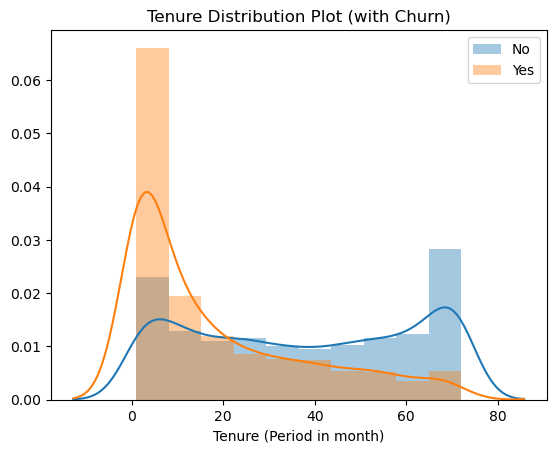

In [34]:
# Tenure Distribution Plot (with Churn)

sns.distplot(df[df['Churn']=='No']['Tenure'], label = 'No', bins = 10) # Blue
sns.distplot(df[df['Churn']=='Yes']['Tenure'], label = 'Yes', bins = 10) # Orange
plt.title('Tenure Distribution Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Tenure (Period in month)')
plt.legend()

* We can infer that the customers that has relatively low Tenure tends to Churn (Shorter Tenure period customers has higher Churn rate than longer ones).
* The longer our customers use our service, the Churn rate will be lower.

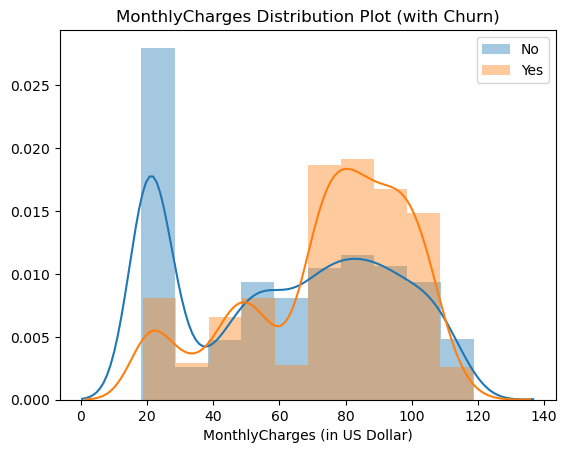

In [35]:
# MonthlyCharges Distribution Plot (with Churn)

sns.distplot(df[df['Churn']=='No']['MonthlyCharges'], label = 'No', bins = 10) # Blue
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'], label = 'Yes', bins = 10) # Orange
plt.title('MonthlyCharges Distribution Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('MonthlyCharges (in US Dollar)')
plt.legend()

* We can infer that customers with higher MonthlyCharges (in the range of around 70 until 110) tends to Churn.

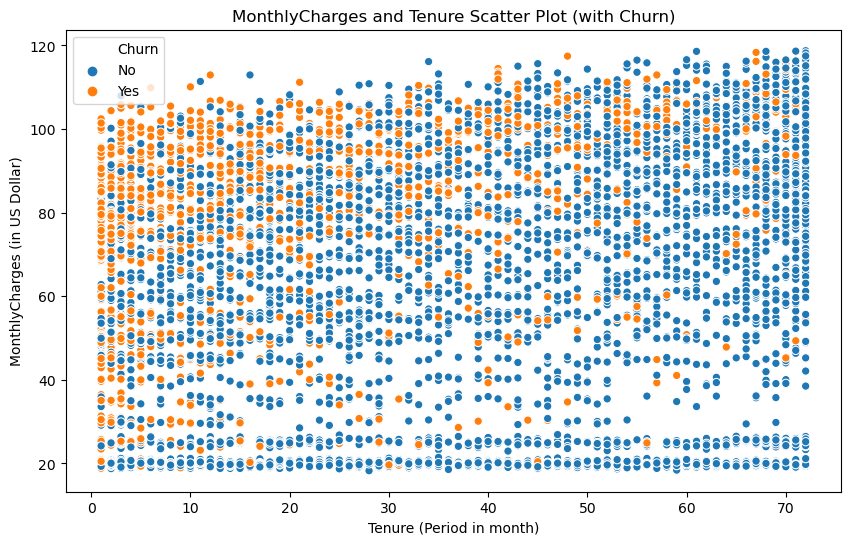

In [36]:
# Scatter Plot between Tenure and MonthlyCharges with Churn as hue

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Tenure', y = 'MonthlyCharges', hue = 'Churn', data = df)
plt.title('MonthlyCharges and Tenure Scatter Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Tenure (Period in month)')
plt.ylabel('MonthlyCharges (in US Dollar)')
plt.legend()

# Looking for the pattern between Tenure and MonthlyCharges with Churn

* We can see the pattern of our churned customers; it is relatively dense in the area of short Tenure and high MonthlyCharges. 

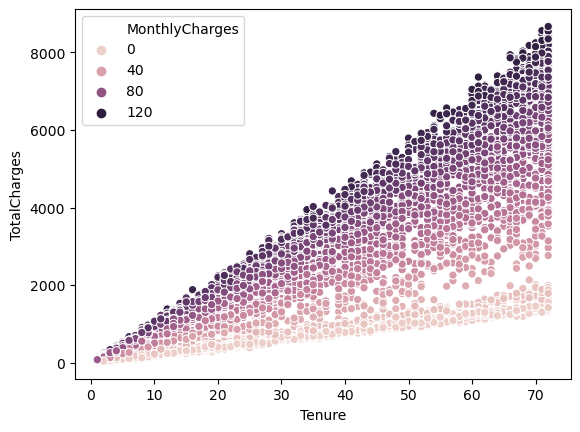

In [37]:
sns.scatterplot(x = 'Tenure', y = 'TotalCharges', hue = 'MonthlyCharges', data = df)

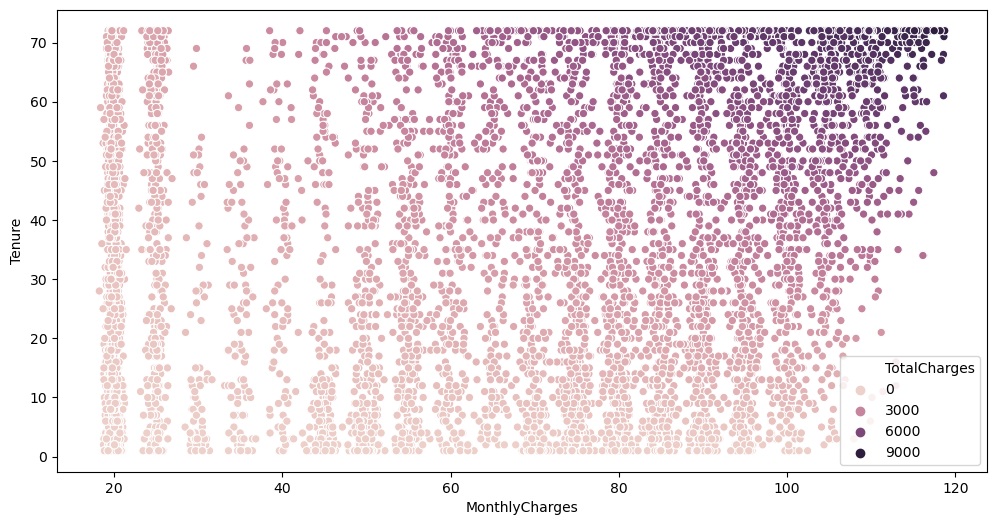

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'MonthlyCharges', y = 'Tenure', hue = 'TotalCharges', data = df)

* TotalCharges feature is the multiplication result of MonthlyCharges times Tenure. The higher the Tenure and MonthlyCharges, the higher the TotalCharges will become.

# Insight and Action Plan

## Insight

Based on the EDA, I summarized the Churn rate of each feature and classified it based on Urgency and Impact (have higher Churn rate than other features):

High (one of the value has 40% or more Churn rate):
* InternetService - Fiber Optic: Customers that used our Fiber optic InternetService has 42% Churn rate, while the customers that used our DSL InternetService only has 19% Churn rate.
* InternetService - No Online security: Customers that used our InternetService without online security has 42% Churn rate, while the customers that used our InternetService and online security service has 15% Churn rate.
* InternetService - No Online backup: Customers that used our InternetService without online security has 40% Churn rate, while the customers that used our InternetService and online backup service has 22% Churn rate.
* InternetService - No Device protection: Customers that used our InternetService without device protection has 39% Churn rate, while the customers that used our InternetService and device protection service has 23% Churn rate.
* InternetService - No Tech support: Customers that used our InternetService without tech support has 42% Churn rate, while the customers that used our InternetService and tech support service has 15% Churn rate.
* PaymentMethod - Electronic Check: Customers who used Electronic check as their PaymentMethod has the highest Churn rate (45%). Meanwhile, the customers who used Mailed check, Bank transfer (automatic), and Credit card (automatic) PaymentMethod has 19%, 17%, and 15% Churn rate respectively.
* Contract: Customers who used month-to-month has 43% Churn rate. Meanwhile, the customers who used 1-year and 2-year contract has 11% and 3% Churn rate respectively.
* Tenure: The shorter the tenure period is, the higher the Churn rate. The longer period our customers used our service, the Churn rate will be lower.
* MonthlyCharges: The higher the MonthlyCharges is, the higher the Churn rate.

Medium (has lower Churn rate than above):
* SeniorCitizen: Although the amount of SeniorCitizen customers is smaller compared to non-SeniorCitizen customers (only 16% of total customers), the Churn ratio of the customers belong to this category is 41%.
* Partner: Customers without partner has 33% Churn rate, while customers with partner has 20% Churn rate.
* Dependents: Customers without dependents has 31% Churn rate, while customers without dependents has 16% Churn rate.
* PaperlessBilling: Customers who used PaperlessBilling has 34% Churn rate, while the customers who did not use PaperlessBilling has 16% Churn rate.

Low (based on EDA, the features that belong in this category does not necessarily cause customer to Churn):
* Gender: This feature has relatively similar Churn rate between male and female. We can infer that the reason of our customers who churned is not necessarily because of Gender. 
* PhoneService / MultipleLines: This feature has relatively similar Churn rate between each category. We can infer that the reason of our customers who churned is not necessarily because of PhoneService or MultipleLines. 
* StreamingTV / StreamingMovies: This feature has relatively similar Churn rate between each category. We can infer that the reason of our customers who churned is not necessarily because of StreamingTV or StreamingMovies.

## Action Plan

For each feature, we can offer several solutions based on the problem:

High:
* InternetService - Fiber Optic: Improve the connection, troubleshoot Fiber Optic cables, find another vendor if necessary.
* InternetService - No Additional Services (Online Security, Online Backup, Device Protection, Tech Support): Emphasize on the importance of the online privacy, data safety, device protection, reduce delay on tech support, and troubleshooting via tech support if there is any problem. 
* PaymentMethod - Electronic Check: Troubleshoot the eCheck problems, find another third party if necessary, offer another method to the customers for the time being.
* Contract: Relaxing the policy on the month-to-month contract type.
* Tenure: Offer promotion or membership for the short-term customers.
* MonthlyCharges: Offer discount and special offers.

Medium:
* SeniorCitizen: Offer guidance and more support for SeniorCitizen customers, offer more content that appeals elder people.
* Partner / Dependents: Lower the price for the services, make a promo bundling.
* PaperlessBilling: Educate to customers the importance of the paper billing as proof of payment.

Low to None:
* Gender, PhoneService / MultipleLines, StreamingTV / StreamingMovies: These features has little to no impact to Churn rate. If anything, we could try to improve our connection of PhoneService or offer more content that appeals all audiences within certain timeslot (children movies in the morning, old movies in the afternoon, blockbuster movies in the after dinner timeslot / primetime).

_____________


## Helpful Links

* https://www.investopedia.com/terms/c/churnrate.asp
* https://dictionary.cambridge.org/dictionary/english/senior-citizen
* https://dictionary.cambridge.org/dictionary/english/dependent
* https://www.temukanpengertian.com/2013/06/pengertian-dsl.html
* https://teknikelektronika.com/pengertian-fiber-optik-optical-fiber-jenis-jenis-fiber-optik/
* https://paysimple.com/blog/how-do-echecks-work/#:~:text=An%20eCheck%2C%20or%20electronic%20check,into%20the%20payee's%20checking%20account.
* https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


On this dataset, we want to focus on Recall (reducing FN value), we want to put optimum effort to customers who are actually going to churn but our model predicts it as a negative.

## For Image purposes

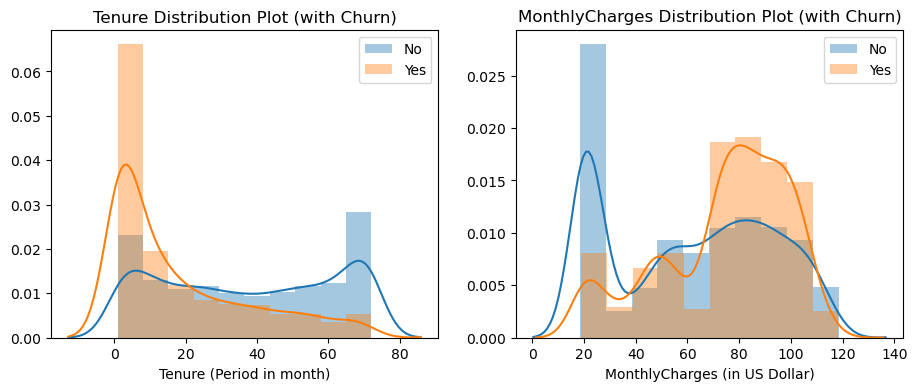

In [39]:
# Tenure & Monthly Charges Distribution Plot (with Churn)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.distplot(df[df['Churn']=='No']['Tenure'], label = 'No', bins = 10) # Blue
sns.distplot(df[df['Churn']=='Yes']['Tenure'], label = 'Yes', bins = 10) # Orange
plt.title('Tenure Distribution Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Tenure (Period in month)')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'], label = 'No', bins = 10) # Blue
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'], label = 'Yes', bins = 10) # Orange
plt.title('MonthlyCharges Distribution Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('MonthlyCharges (in US Dollar)')
plt.legend()

plt.savefig('distplot.png')

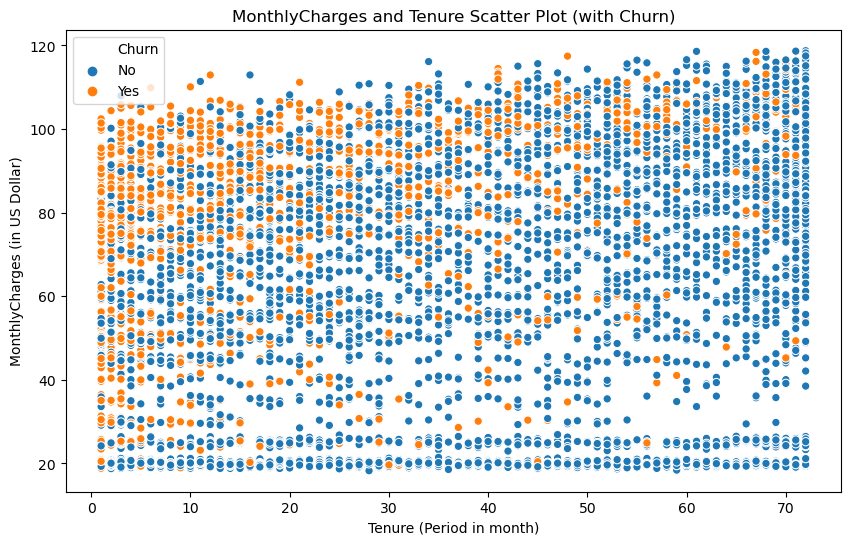

In [40]:
# Scatter Plot between Tenure and MonthlyCharges with Churn as hue

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Tenure', y = 'MonthlyCharges', hue = 'Churn', data = df)
plt.title('MonthlyCharges and Tenure Scatter Plot (with Churn)', fontdict={'fontsize':12})
plt.xlabel('Tenure (Period in month)')
plt.ylabel('MonthlyCharges (in US Dollar)')
plt.legend()

plt.savefig('scatterplot.png')

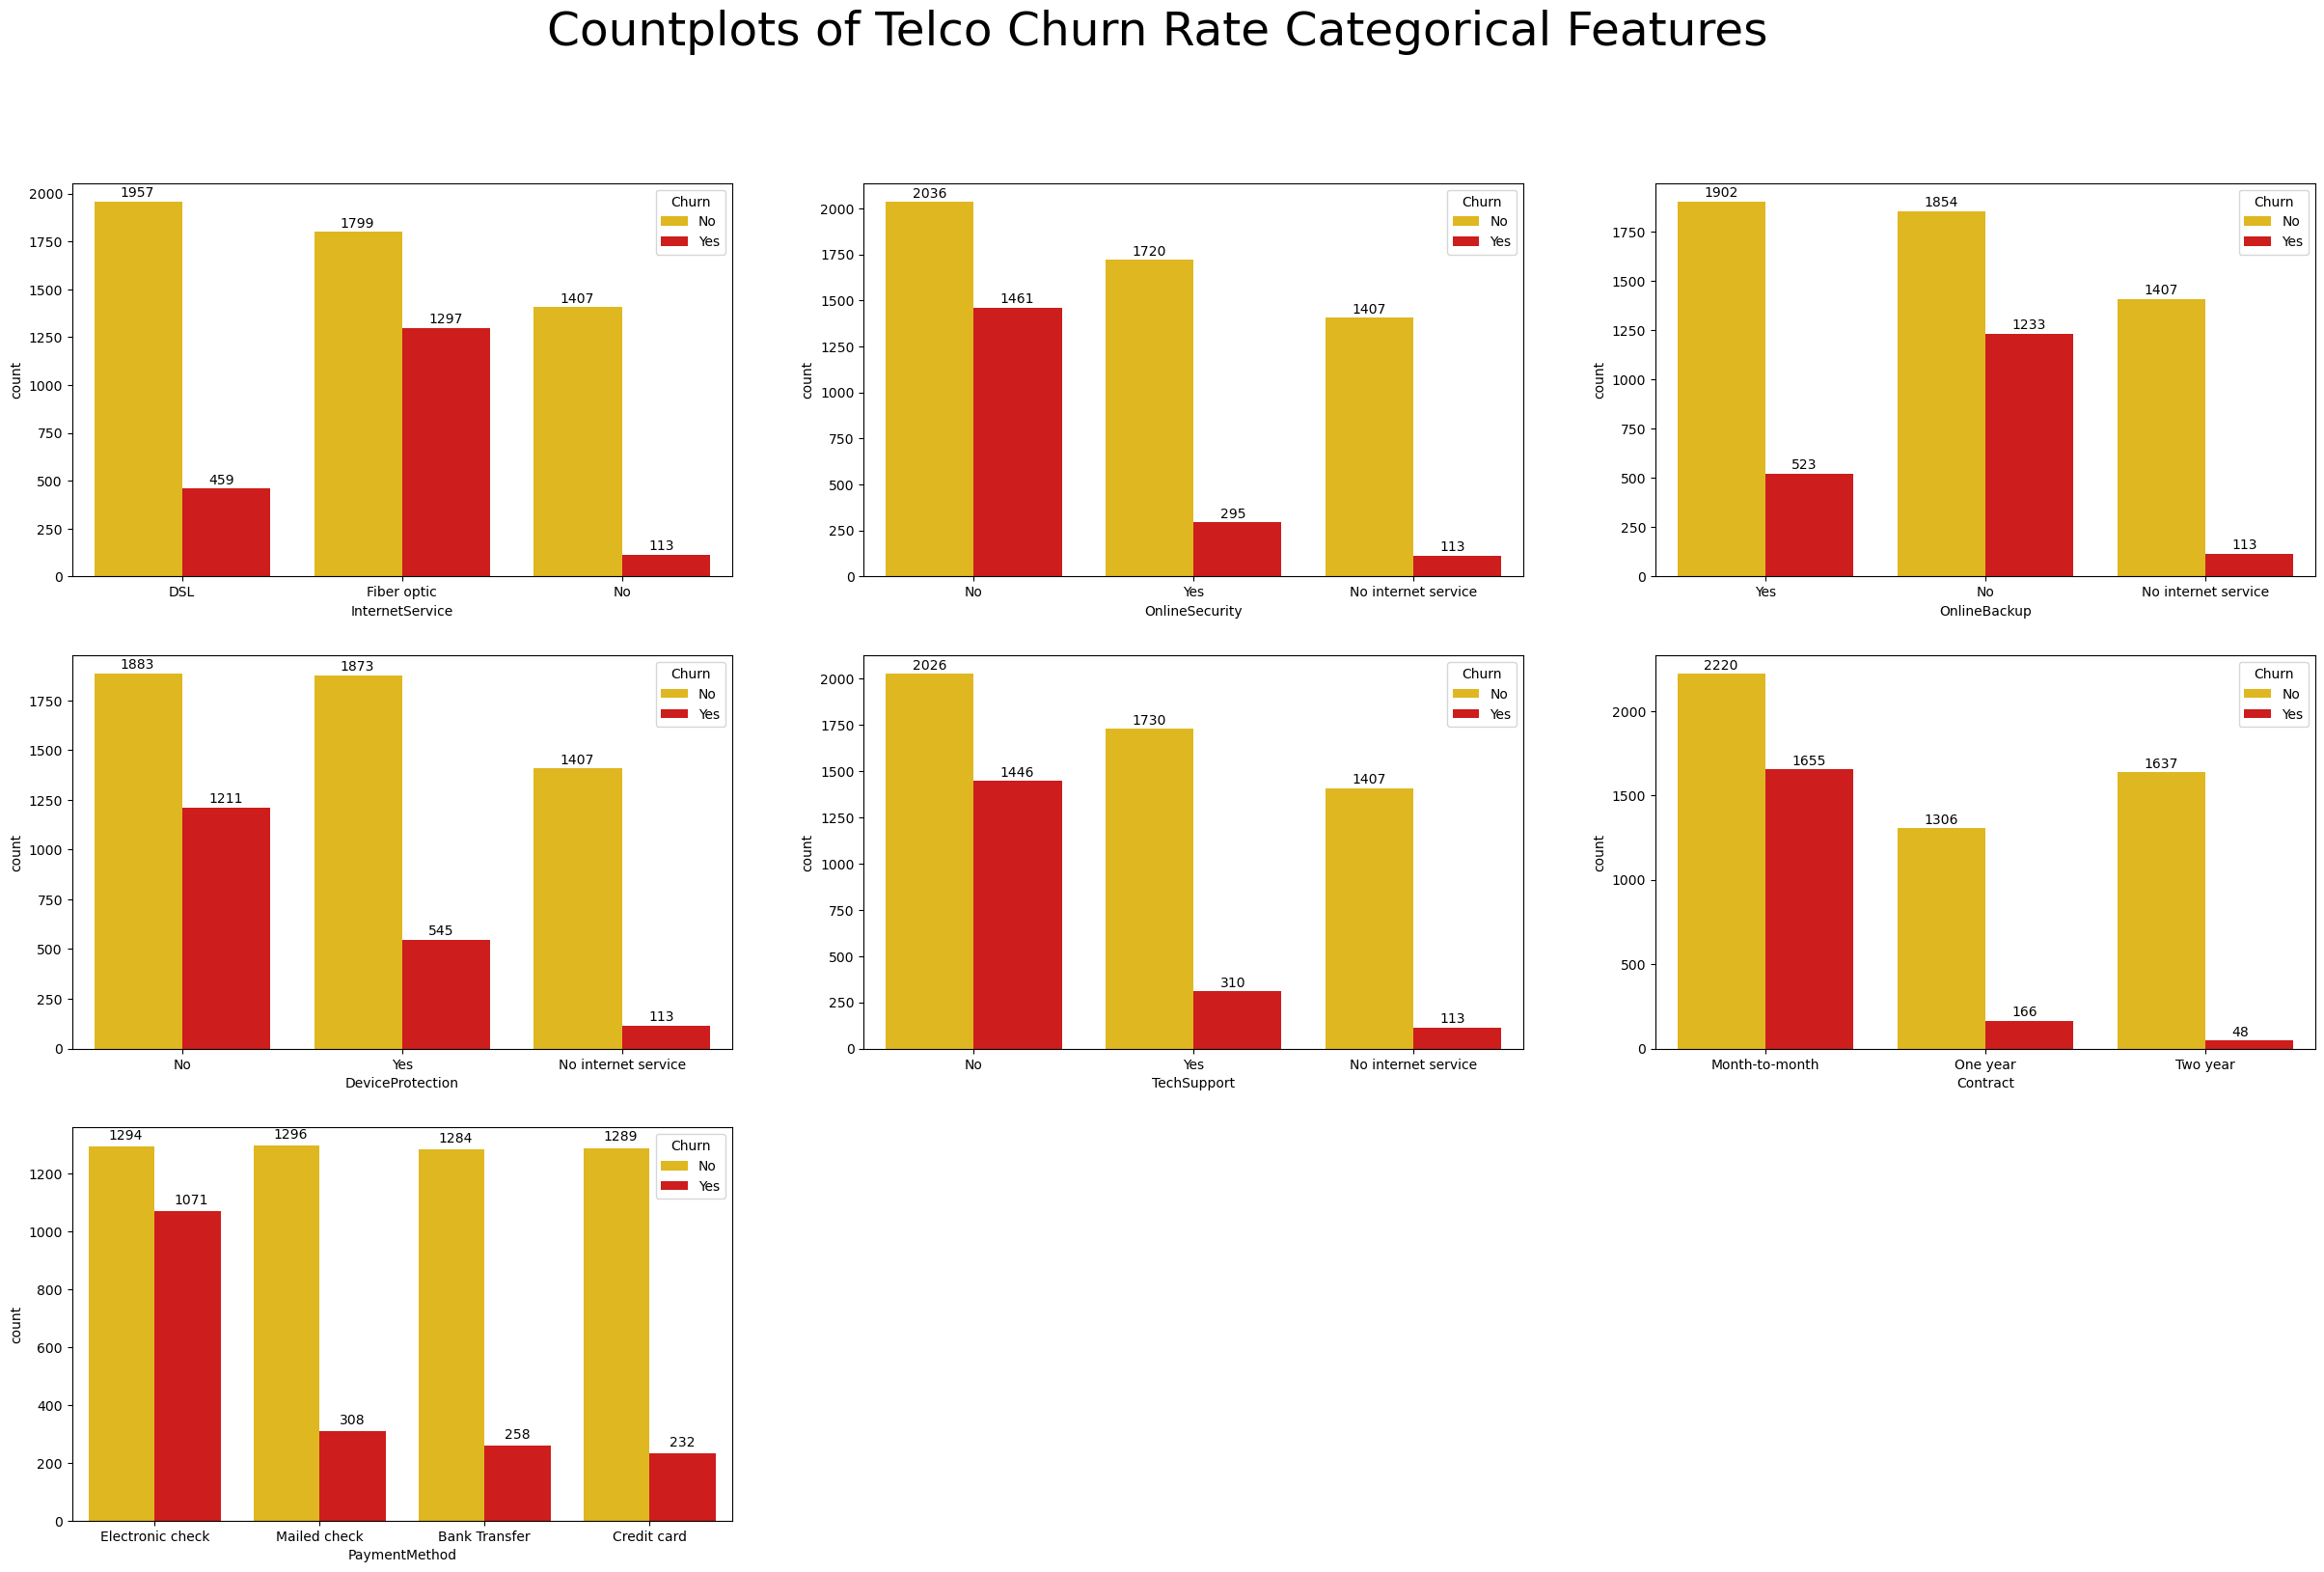

In [41]:
df_fig = df.drop(columns=['CustomerID','Tenure','MonthlyCharges','TotalCharges','Churn','Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','StreamingTV','StreamingMovies','PaperlessBilling'])
df_fig['PaymentMethod'] = df_fig['PaymentMethod'].replace(['Bank transfer (automatic)','Credit card (automatic)'],['Bank Transfer','Credit card'])

kolom = df_fig.columns
plt.figure(figsize=(30,18))
plt.suptitle('Countplots of Telco Churn Rate Categorical Features', size = 35)
for i in range(len(kolom)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x = df_fig[kolom[i]], hue = 'Churn', data = df, palette='hot_r')

    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+25))

plt.savefig('countplot.png')

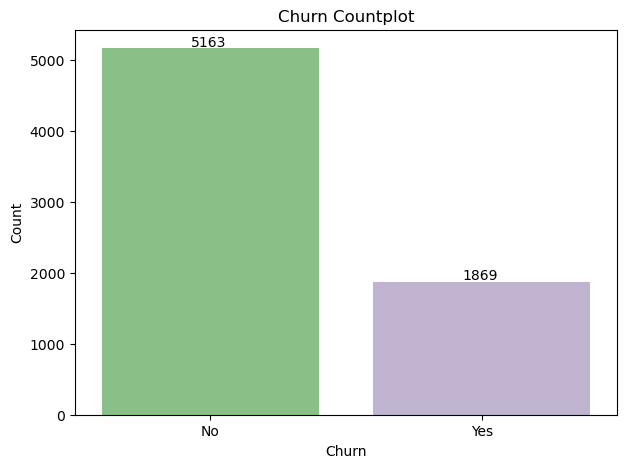

In [42]:
# Churn Countplot

plt.style.use('default')
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Churn', data=df, palette='Accent')
plt.title('Churn Countplot', fontdict={'fontsize':12})
plt.xlabel('Churn')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+30))

plt.savefig('churnplot.png')